### Utility functions

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import pixiedust

Pixiedust database opened successfully


### SingleShotDetector

In [2]:
import torch
import numpy as np
import json
import os
from pathlib import Path

### Pascal VOC Data

In [3]:
import fastai
import numpy as np
import pandas as pd
from pathlib import Path

from fastai.vision.transform import get_transforms
from fastai.vision.data import ObjectItemList, imagenet_stats#, bb_pad_collate
from fastai import *
from fastai.vision import *
%matplotlib inline

In [4]:
PATH = Path(r'data/singleCardMulti')
JPEGS = 'img'
IMG_PATH = PATH/JPEGS

In [5]:
images, lbl_bbox = get_annotations(PATH/'singleCardMulti.json')

In [6]:
lbls = [lbl_bbox[i][1] for i in range(len(lbl_bbox))]

In [7]:
img2bbox = dict(zip(images, lbls))
def get_y_func(x):
    return img2bbox[x.name]

In [8]:
data = (ImageList.from_folder(PATH/JPEGS)
        .split_by_rand_pct()       
        .label_from_func(get_y_func)
        .transform(get_transforms(flip_vert=True), size=150)
        .databunch(bs=16))
        #.normalize(imagenet_stats)) 

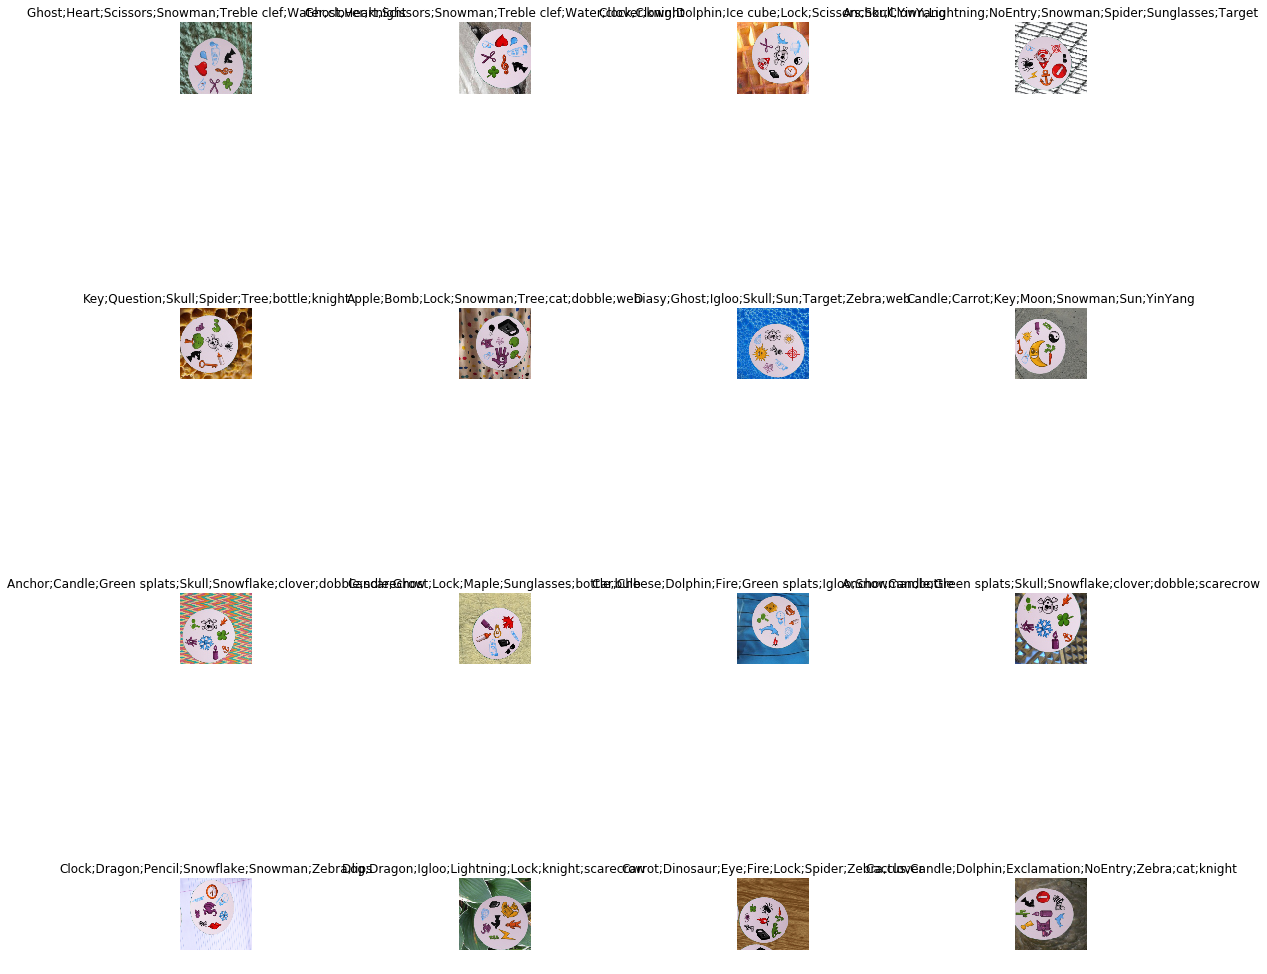

In [9]:
#%%time
data.show_batch()

In [10]:
arch = models.resnet34
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


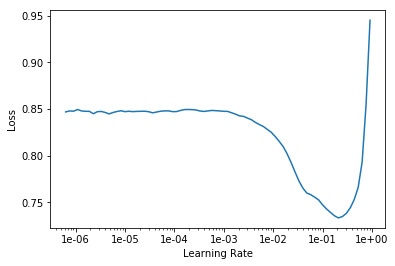

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.02

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.581819,0.351937,0.815648,0.426708,00:03
1,0.406934,0.252868,0.843148,0.667440,00:02
2,0.310224,0.172804,0.911944,0.807748,00:03
3,0.240246,0.120665,0.951852,0.889079,00:03
4,0.196038,0.108958,0.955093,0.910076,00:03


In [15]:
learn.save('class-1-rn34')

In [16]:
learn.load('class-1-rn34')

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
Candle;bulb;Maple;Candle;bottle;Ghost;Lock;Sunglasses,Dinosaur;Ghost;Apple;Ladybird;Anchor;Dolphin,Lightning;Scissors;Diasy;Cheese;Eye;Bomb;Candle,web;lips;Exclamation;clover;Dolphin;bulb;Moon;Lightning,Zebra;bottle;Bomb;Dog;Heart;Moon;Anchor;Ice cube
Path: data/singleCardMulti/img;

Valid: LabelList (200 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
Snowflake;Dinosaur;bulb;Target;knight;Car;YinYang;Bomb,Zebra;bottle;Bomb;Dog;Heart;Moon;Anchor;Ice cube,Candle;bulb;Maple;Candle;bottle;Ghost;Lock;Sunglasses,clover;Scissors;Snowman;Heart;Treble clef;knight;Water;Ghost,Dinosaur;web;Scissors;Dog;Green splats;Key;NoEntry;Pencil
Path: data/singleCardMulti/img;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 6

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


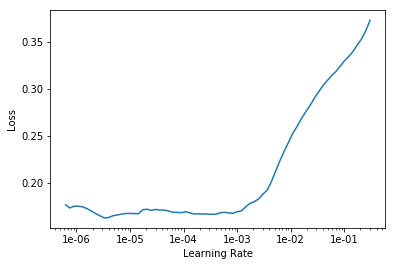

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(15, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.165814,0.095629,0.963704,0.928732,00:03
1,0.153042,0.083850,0.961204,0.923982,00:03
2,0.137833,0.055886,0.982222,0.967488,00:03
3,0.122606,0.034382,0.991019,0.985898,00:03
4,0.103593,0.021041,0.994537,0.990992,00:03
5,0.119875,0.074953,0.966204,0.924655,00:03
6,0.103453,0.009135,0.998704,0.998265,00:03
7,0.093306,0.026764,0.993889,0.985123,00:03
8,0.081716,0.007717,0.998148,0.997163,00:03
9,0.066290,0.003280,0.999907,0.999839,00:03


In [18]:
learn.save('150px-3-rn34')

In [10]:
learn.load('150px-3-rn34')

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
Candle;bulb;Maple;Candle;bottle;Ghost;Lock;Sunglasses,Dinosaur;Ghost;Apple;Ladybird;Anchor;Dolphin,Lightning;Scissors;Diasy;Cheese;Eye;Bomb;Candle,web;lips;Exclamation;clover;Dolphin;bulb;Moon;Lightning,Zebra;bottle;Bomb;Dog;Heart;Moon;Anchor;Ice cube
Path: data/singleCardMulti/img;

Valid: LabelList (200 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
Candle;Ice cube;Ladybird;Dragon;Car;Spider;web;Water,Exclamation;Candle;NoEntry;knight;Cactus;cat;Dolphin;Zebra,Anchor;clover;scarecrow;Candle;Snowflake;Skull;dobble;Green splats,Sun;Apple;Sunglasses;Eye;Green splats;Ice cube;lips;knight,Cactus;Apple;Car;Heart;Lightning;Pencil;Carrot;Skull
Path: data/singleCardMulti/img;

Test: None, model=Sequential(
  (0): Sequential(
    (0

In [19]:
learn.path = Path("models")
learn.export()

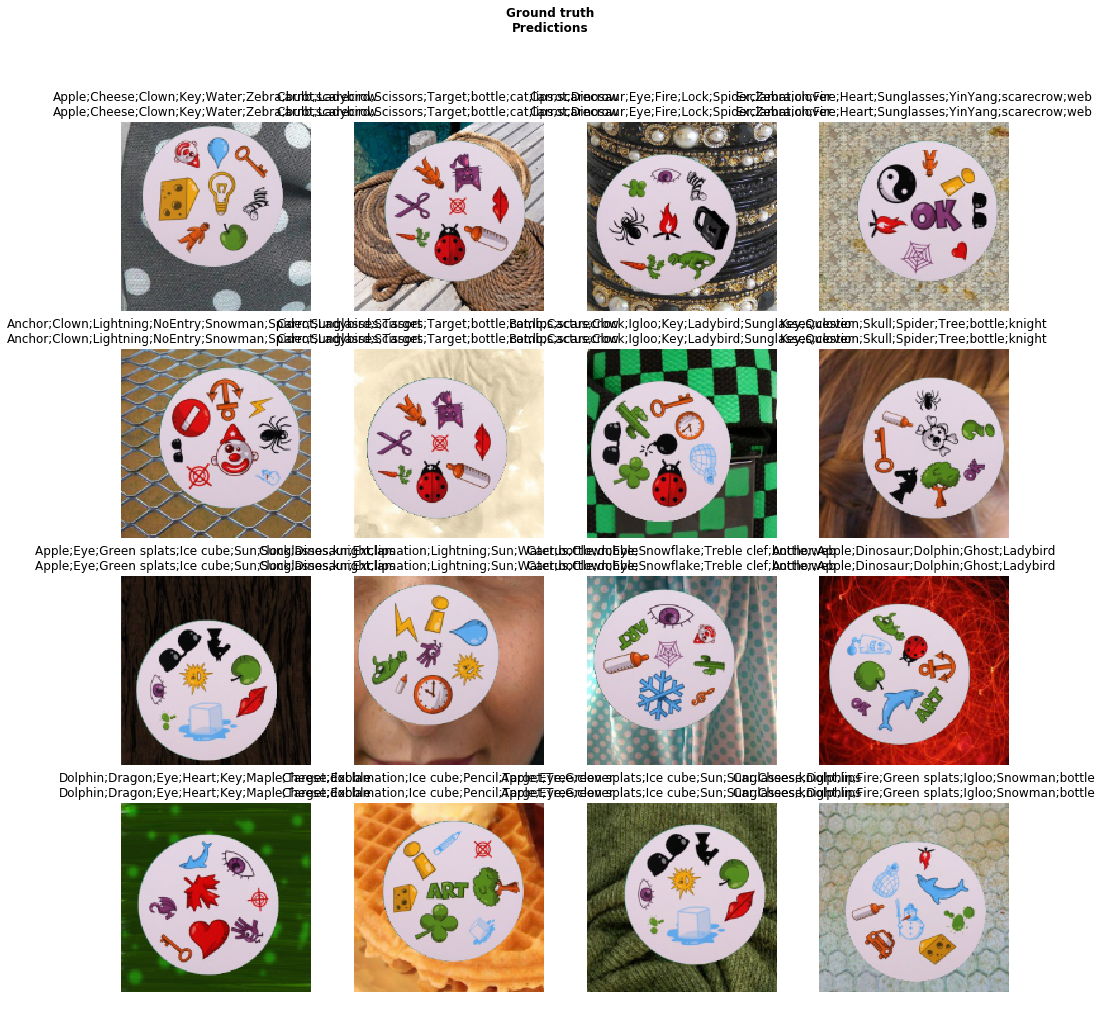

In [20]:
#%%pixie_debugger
learn.show_results()

In [15]:
it = iter(learn.data.valid_dl)
for x in range(1):
    xb, yb = next(it)

In [16]:
xb[0]

tensor([[[0.4196, 0.4892, 0.4901,  ..., 0.4086, 0.5349, 0.6529],
         [0.3779, 0.5737, 0.6229,  ..., 0.4689, 0.5750, 0.6657],
         [0.4532, 0.6382, 0.6657,  ..., 0.4814, 0.4345, 0.3428],
         ...,
         [0.3432, 0.3816, 0.4267,  ..., 0.4588, 0.4123, 0.3928],
         [0.4103, 0.4342, 0.4772,  ..., 0.4576, 0.4134, 0.4572],
         [0.4892, 0.5053, 0.5547,  ..., 0.5226, 0.4774, 0.5471]],

        [[0.3333, 0.4068, 0.4079,  ..., 0.3294, 0.4584, 0.6010],
         [0.2916, 0.5033, 0.5642,  ..., 0.3838, 0.4955, 0.6049],
         [0.3709, 0.5813, 0.6230,  ..., 0.3935, 0.3522, 0.2762],
         ...,
         [0.2845, 0.3227, 0.3618,  ..., 0.3925, 0.3343, 0.3108],
         [0.3407, 0.3735, 0.4203,  ..., 0.3920, 0.3321, 0.3709],
         [0.4118, 0.4407, 0.5017,  ..., 0.4661, 0.4060, 0.4686]],

        [[0.6235, 0.7127, 0.7091,  ..., 0.5783, 0.6831, 0.7843],
         [0.5818, 0.7645, 0.8070,  ..., 0.6435, 0.7427, 0.8217],
         [0.6511, 0.7927, 0.8114,  ..., 0.6588, 0.6030, 0.